In [1]:
from src.sentinel_api import get_sentinel_api
from src.constant import GEOJSON_PATH, DOWNLOADED_DATA_PATH, REMOVE_ZIPS
import os

# get api 
api = get_sentinel_api()

In [2]:
products_query = api.query(filename = 'S1A_WV_SLC__1SSV_20200530T143042_20200530T143553_032795_03CC7D_1A0F*')

os.makedirs(DOWNLOADED_DATA_PATH, exist_ok = True) 
products = api.download_all(products_query, DOWNLOADED_DATA_PATH)
print(products)

(OrderedDict([('8f09a5cb-2363-4947-8088-8f77c1bafe95', {'id': '8f09a5cb-2363-4947-8088-8f77c1bafe95', 'title': 'S1A_WV_SLC__1SSV_20200530T143042_20200530T143553_032795_03CC7D_1A0F', 'size': 1722097842, 'md5': '9C9187D1D5FF403B4545BE9631BEE6B7', 'date': datetime.datetime(2020, 5, 30, 14, 30, 42, 815000), 'footprint': 'POLYGON((63.830803 -43.887074,63.151588 -42.154816,62.504585 -40.418411,61.886894 -38.678856,61.827015 -38.501762,61.295235 -36.936005,60.714588 -35.193008,60.167976 -33.444366,59.640621 -31.693197,59.58918 -31.514786,59.130512 -29.939928,58.625515 -28.187044,58.145924 -26.429497,58.098911 -26.250341,59.661251 -24.964622,59.857704 -24.918411,59.906101 -25.091785,60.359322 -26.670792,60.409111 -26.843517,60.876888 -28.419735,60.928467 -28.592663,61.412178 -30.166578,61.465569 -30.339216,61.967022 -31.910803,62.022411 -32.083168,62.549042 -33.65086,62.606594 -33.822777,63.148766 -35.388817,63.208775 -35.56052,63.774323 -37.123535,63.836926 -37.294666,64.428116 -38.853909,65.

In [3]:
file_titles = []
zip_files = []

for product in products:
    for product_id in product:
        file_titles.append(product[product_id]['title'])
        zip_files.append(product[product_id]['path'])

        import zipfile
        archive = zipfile.ZipFile(product[product_id]['path'], 'r')
        archive.extractall(path=DOWNLOADED_DATA_PATH)

for zip_file in zip_files:
    if REMOVE_ZIPS:
        os.remove(zip_file)     

s1a-wv1-slc-vv-20200530t143042-20200530t143045-032795-03cc7d-001.tiff
/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


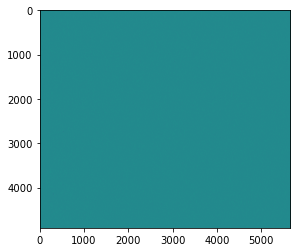

s1a-wv1-slc-vv-20200530t143112-20200530t143115-032795-03cc7d-003.tiff


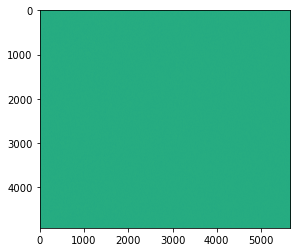

s1a-wv1-slc-vv-20200530t143141-20200530t143144-032795-03cc7d-005.tiff


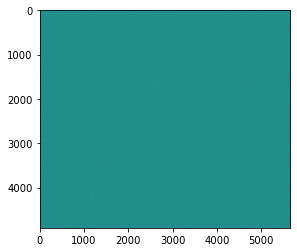

s1a-wv1-slc-vv-20200530t143210-20200530t143213-032795-03cc7d-007.tiff


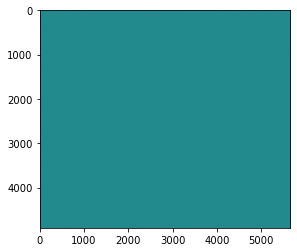

s1a-wv1-slc-vv-20200530t143239-20200530t143242-032795-03cc7d-009.tiff


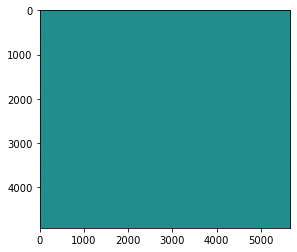

s1a-wv1-slc-vv-20200530t143309-20200530t143312-032795-03cc7d-011.tiff


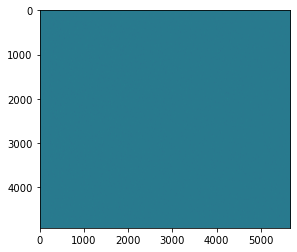

s1a-wv1-slc-vv-20200530t143338-20200530t143341-032795-03cc7d-013.tiff


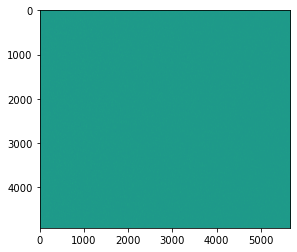

s1a-wv1-slc-vv-20200530t143407-20200530t143410-032795-03cc7d-015.tiff


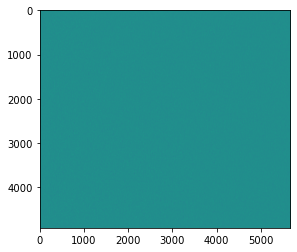

s1a-wv1-slc-vv-20200530t143437-20200530t143440-032795-03cc7d-017.tiff


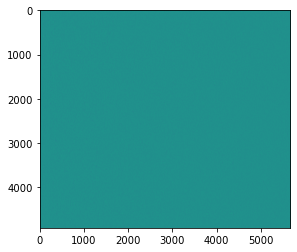

s1a-wv1-slc-vv-20200530t143506-20200530t143509-032795-03cc7d-019.tiff


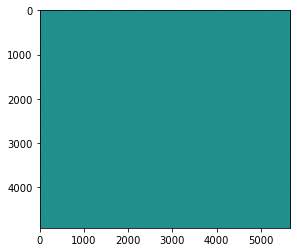

s1a-wv1-slc-vv-20200530t143535-20200530t143538-032795-03cc7d-021.tiff


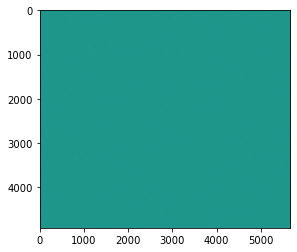

s1a-wv2-slc-vv-20200530t143057-20200530t143100-032795-03cc7d-002.tiff


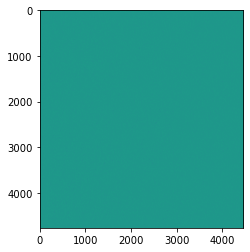

s1a-wv2-slc-vv-20200530t143126-20200530t143129-032795-03cc7d-004.tiff


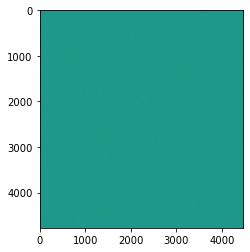

s1a-wv2-slc-vv-20200530t143156-20200530t143158-032795-03cc7d-006.tiff


MemoryError: Unable to allocate 326. MiB for an array with shape (1, 4780, 4466) and data type complex128

In [4]:
import rasterio
import rasterio.features
import rasterio.warp
import matplotlib.pyplot as plt

for file_title in file_titles:
    measurement_path = os.path.join(DOWNLOADED_DATA_PATH, '{}.SAFE'.format(file_title), 'measurement')
    for tiff_file_name in os.listdir(measurement_path):
        print(tiff_file_name)
        tiff_file_path =  os.path.join(measurement_path, tiff_file_name)   

        with rasterio.open(tiff_file_path, "r") as dataset:
            # Read the dataset's data
            data = dataset.read(1)

            # Visualise the dataset's data
            fig, ax = plt.subplots()
            img = ax.imshow(data.real)
            plt.show()